<img align="left" src="https://iili.io/HXJBlj9.jpg" style="height:90px" style="width:30px"/>
<br>

# <a id='toc1_'></a>[Fundamentals of Supervised Machine Learning: Linear Regression Part 1](#toc0_)
This notebook serves as a primer on basic machine learning workflows, focusing on linear regression—a cornerstone model in supervised learning. Our journey will explore the construction of a linear regression model, and an analytical approach for feature selection and performance evaluation, utilizing both machine learning algorithms and statistical methods. The goal is to demonstrate a structured process for developing a predictive model, understanding its performance, and refining feature selection to ensure accuracy and reliability.

**Table of contents**<a id='toc0_'></a>    
- [Fundamentals of Supervised Machine Learning: Linear Regression Part 1](#toc1_)    
  - [Exploratory Data Analysis (EDA)](#toc1_1_)    
    - [Dataset Introduction](#toc1_1_1_)    
    - [Distribution Analysis](#toc1_1_2_)    
    - [Linearity Analysis](#toc1_1_3_)    
    - [Correlation Analysis](#toc1_1_4_)    
  - [Data Split](#toc1_2_)    
  - [Linear Regression Model](#toc1_3_)    
    - [RFE | Recursive Feature Elimination](#toc1_3_1_)    
  - [OLS Model](#toc1_4_)    
    - [Libraries and Helper Functions](#toc1_4_1_)    
    - [Training the OLS Regression Model: A Step-by-Step Guide](#toc1_4_2_)    
      - [Incorporate Intercept](#toc1_4_2_1_)    
      - [Model Instantiation and Fitting](#toc1_4_2_2_)    
      - [Iteration 1](#toc1_4_2_3_)    
      - [Iteration 2](#toc1_4_2_4_)    
    - [Model Evaluation](#toc1_4_3_)    
  - [Conclusion](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Exploratory Data Analysis (EDA)](#toc0_)
EDA is essential for uncovering insights, ensuring data quality, and guiding the modeling process. It lays the groundwork for effective and informed analysis.

In [9]:
# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <a id='toc1_1_1_'></a>[Dataset Introduction](#toc0_)
Initial examination reveals a dataset comprised entirely of continuous numerical variables, ideally suited for linear regression analysis. With no missing values present, data cleaning is unnecessary. The target variable for this machine learning endeavor is "Yearly Amount Spent."

In [10]:
# Load the dataset and display basic structure and initial rows for inspection
df = pd.read_csv("customers_numeric.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
# All datapoints are unique
df.nunique()

Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

---
### <a id='toc1_1_2_'></a>[Distribution Analysis](#toc0_)
Our features predominantly follow a near-normal distribution, albeit with a handful of outliers present.

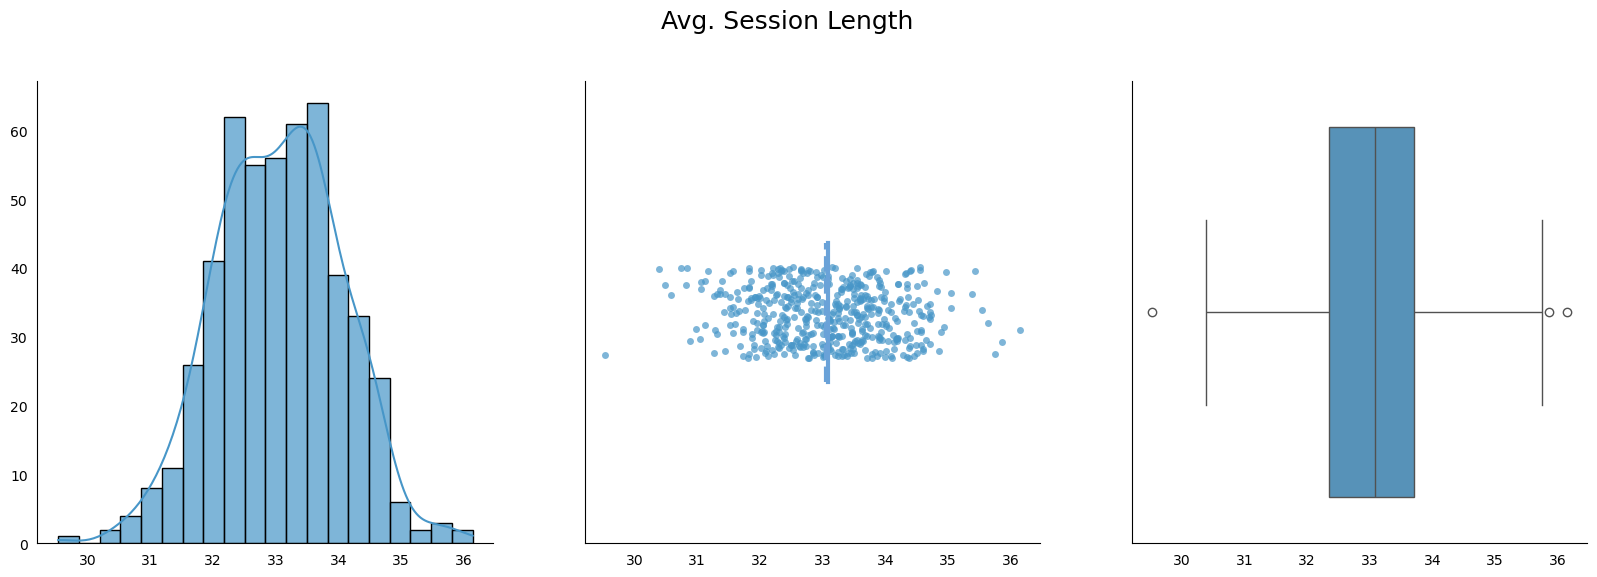

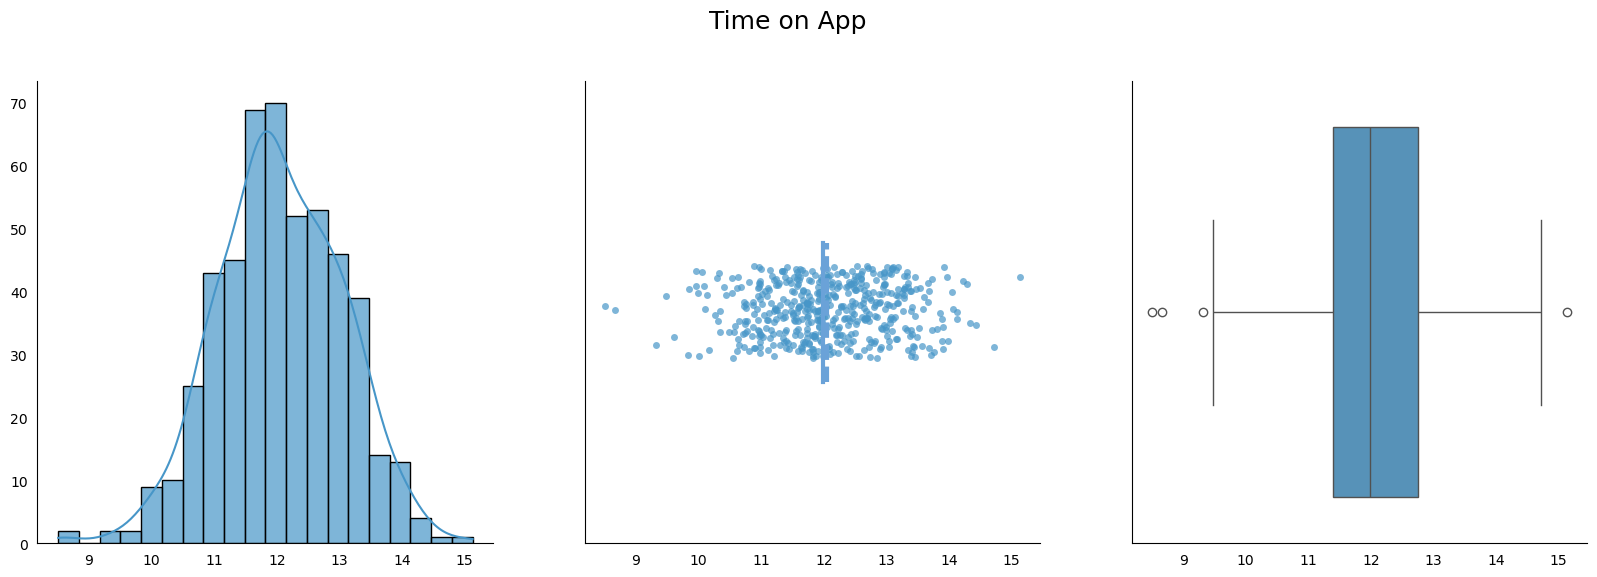

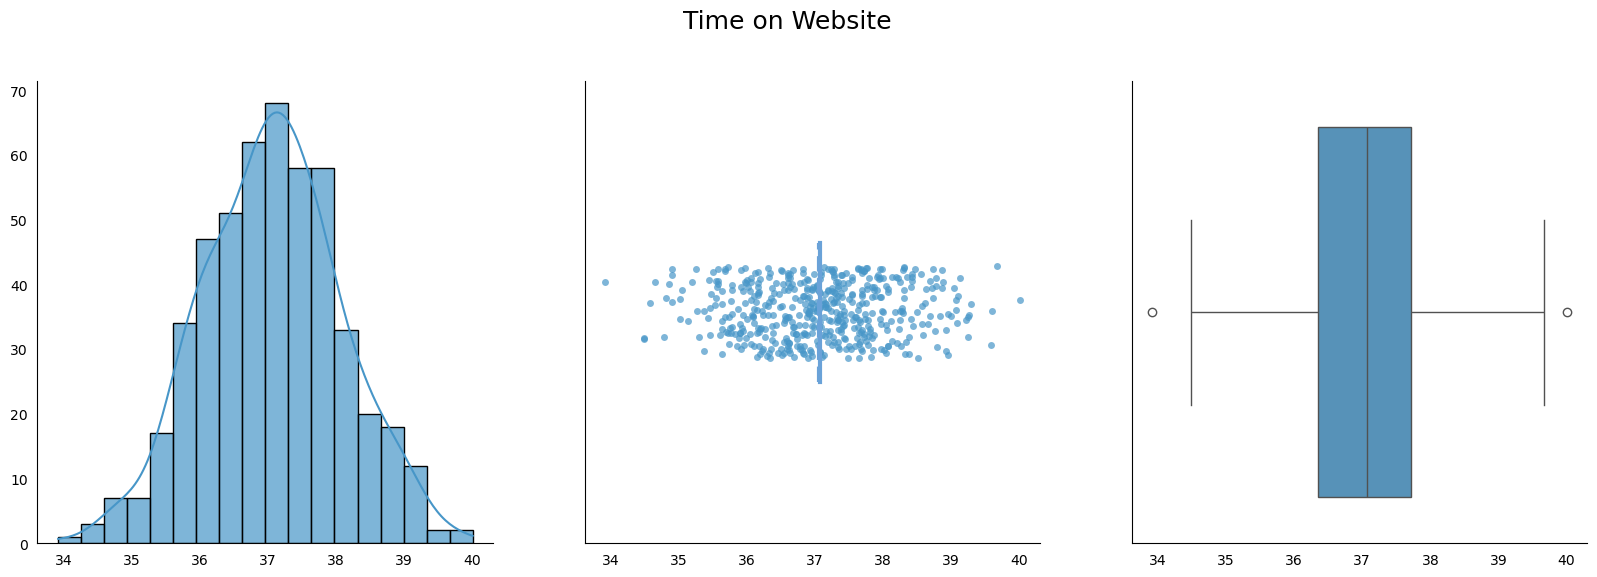

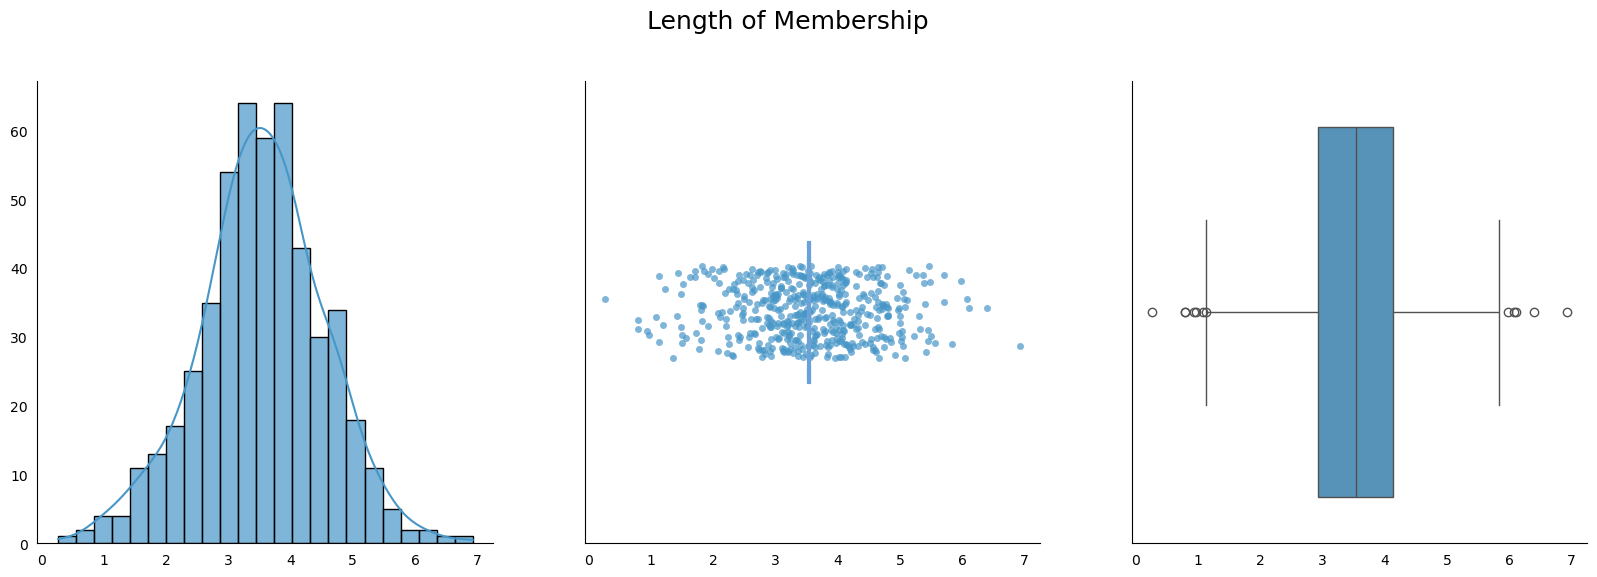

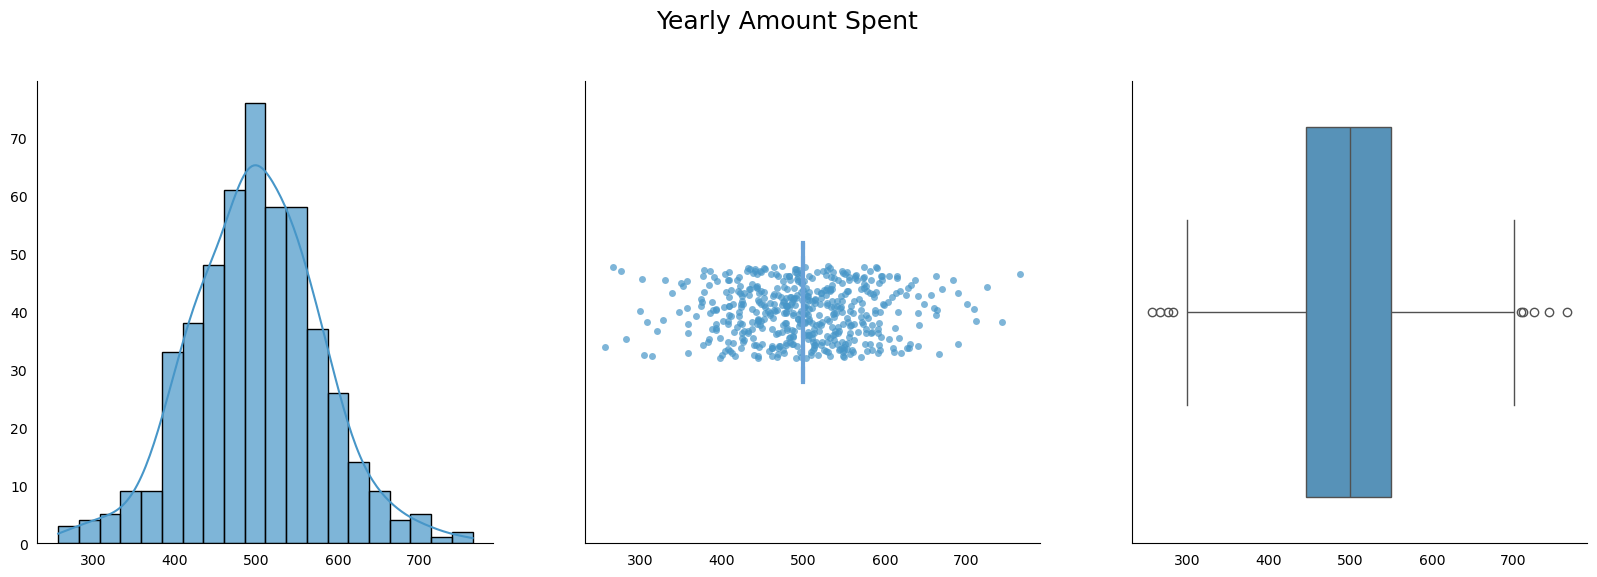

In [12]:
# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

for i in df.select_dtypes('number').columns:
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    # Plots
    sns.histplot(data=df[i], ax=ax[0], kde=True, alpha=0.7)
    sns.stripplot(x=df[i], ax=ax[1], alpha=0.7)
    sns.boxplot(x=df[i], ax=ax[2])

    # Stripplot median and mean line
    median = df[i].median()
    mean = df[i].mean()
    ax[1].axvline(x=median, color='#6AA2D8', linestyle='-', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)  # median
    ax[1].axvline(x=mean, color='#6AA2D8', linestyle='--', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)   # mean

    # Title entire figure
    fig.suptitle(i, fontsize=18, y=1)

    # Hide ticks while keeping labels
    ax[0].tick_params(bottom=False)
    ax[1].tick_params(bottom=False)
    ax[2].tick_params(bottom=False)
    ax[0].tick_params(left=False)
    ax[1].tick_params(left=False)
    ax[2].tick_params(left=False)

    # Hide x and y labels
    ax[0].set(xlabel=None, ylabel=None)
    ax[1].set(xlabel=None, ylabel=None)
    ax[2].set(xlabel=None, ylabel=None)

    sns.despine()

---
### <a id='toc1_1_3_'></a>[Linearity Analysis](#toc0_)
Preliminary examination suggests that `Length of Membership` exhibits a noticeable linear relationship with the target variable. However, it's important to consider that in a multidimensional context, the combined effect of features may significantly influence the model's predictions, even if their individual linear relationships are not apparent.

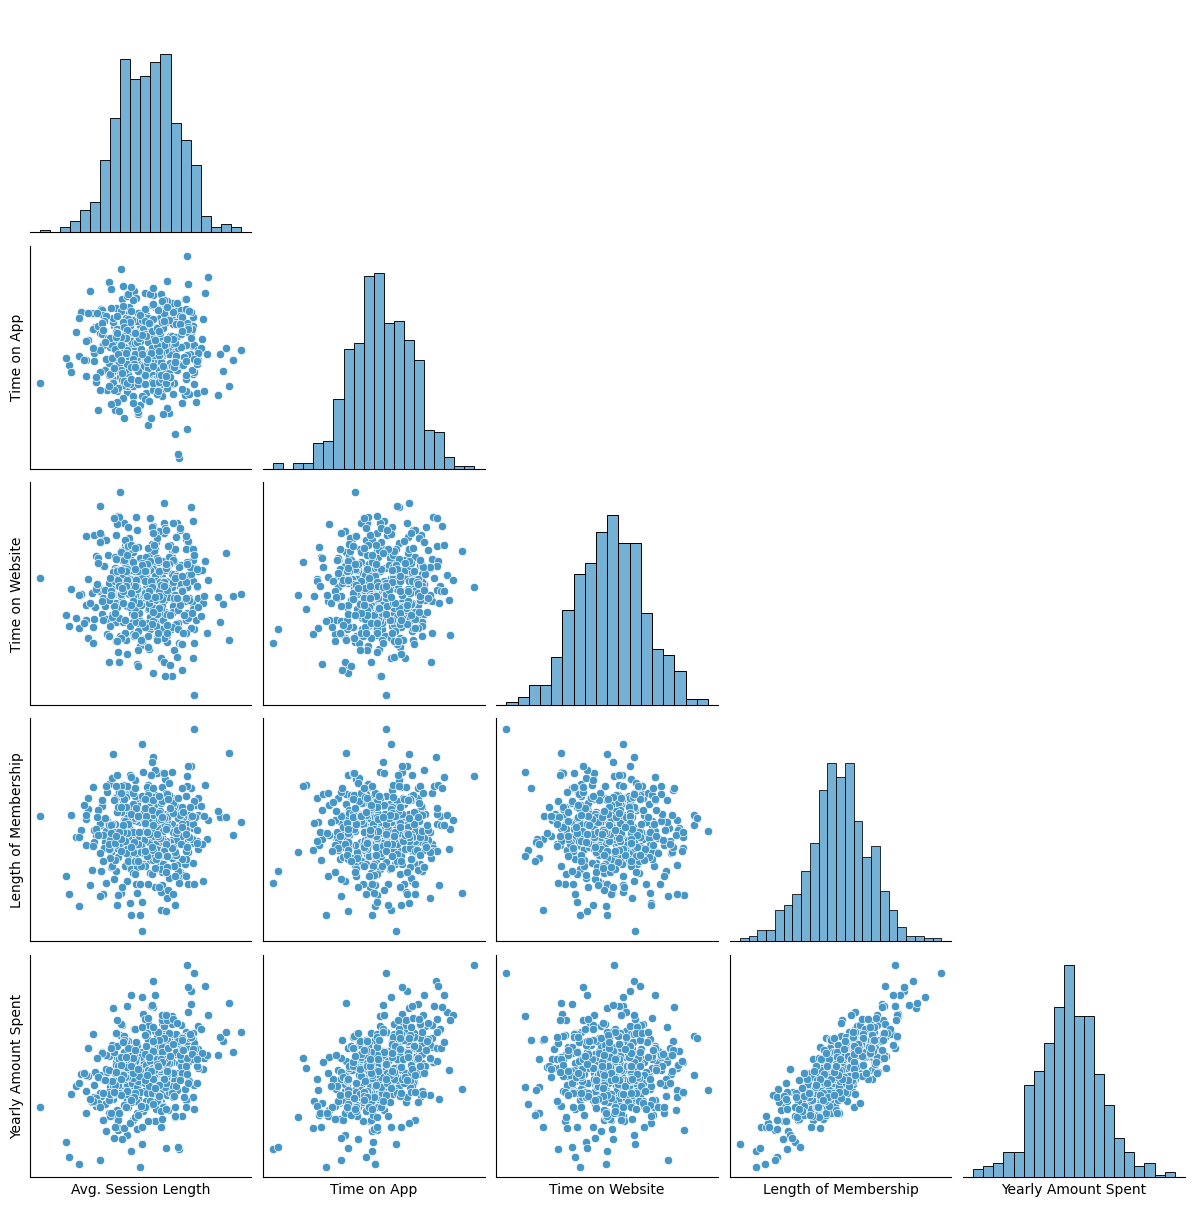

In [13]:
# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

# Pairplot
pairplot = sns.pairplot(df.select_dtypes(include=['number']), corner=True)  # 'int32', 'float64'

# Loop through axes; remove the ticks
for ax in pairplot.axes.flatten():
    if ax:
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()

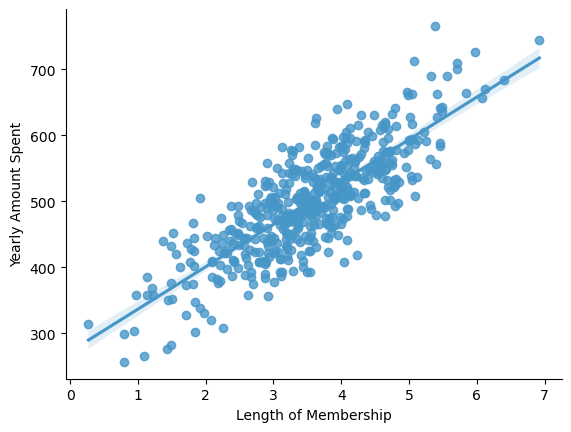

In [14]:
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", data=df)
sns.despine()

---
### <a id='toc1_1_4_'></a>[Correlation Analysis](#toc0_)

The correlation heatmap highlights the relationship between features and `Yearly Amount Spent`, with `Length of Membership` emerging as a significant predictor of spending. This suggests that the duration of membership plays a crucial role in influencing spending patterns, potentially driven by factors like loyalty programs or cumulative expenditures over time.

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$


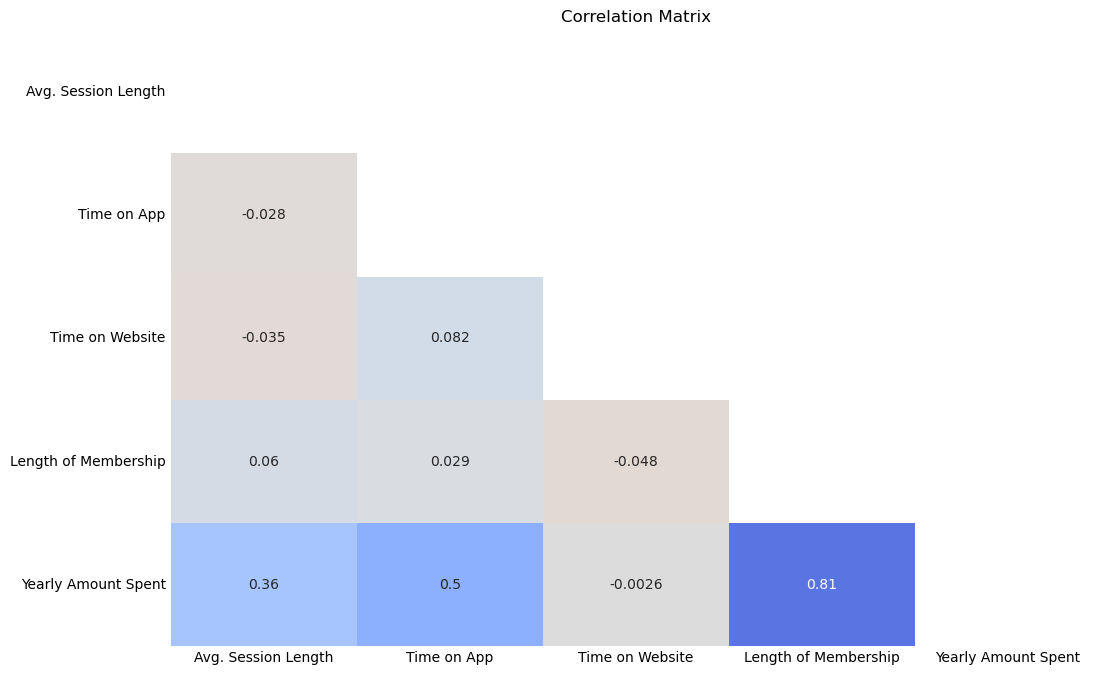

In [15]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True, cmap="coolwarm_r", cbar=None, vmin=-1, vmax=+1, center=0)
plt.title('Correlation Matrix')
# Remove ticks from both x and y axes
plt.tick_params(axis='both', length=0)
plt.show()

---
## <a id='toc1_2_'></a>[Data Split](#toc0_)
The train/test split is a fundamental step in model development, partitioning the data to train the model and independently evaluate its performance. This separation is critical to assess the model's ability to generalize to unseen data, ensuring its predictions are robust and reliable outside the training dataset. It guards against overfitting, where the model performs well on training data but poorly on new data, and is essential for validating the model's real-world applicability.

In [16]:
# Lib
from sklearn.model_selection import train_test_split

# Isolate the target variable
X = df.drop(columns="Yearly Amount Spent")  # independent variables
y = df["Yearly Amount Spent"]               # target variable

# Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <a id='toc1_3_'></a>[Linear Regression Model](#toc0_)
We swiftly construct a multiple linear regression model with just a few lines of code. In this notebook, we skip hyperparameter tuning, allowing us to reveal the model's test score immediately. Typically, we avoid examining test data early to prevent influencing the tuning process, which could lead to overfitting and diminish the model's ability to generalize to new data. Here, without tuning, we present a train score of 98.5 and a test score of 98 upfront. Our next step employs Recursive Feature Elimination (RFE) to eliminate redundant features, aiming to reduce noise and boost the model’s efficiency.

$$\hat{y}^{(i)} = w_0 + w_1 \cdot x_1^{(i)} + w_2 \cdot x_2^{(i)} + w_3 \cdot x_3^{(i)} + w_4 \cdot x_4^{(i)}$$ 

In [17]:
# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [18]:
# Build and Train Model
scaler = StandardScaler()
reg_model = LinearRegression()
pipe = make_pipeline(scaler, reg_model)
pipe.fit(X_train, y_train)

# Predict and display model score on training data
train_pred = pipe.predict(X_train)
print("Train score")
print(r2_score(y_train, train_pred), "\n")

# Predict and display model score on test data
test_pred = pipe.predict(X_test)
print("Test score")
print(r2_score(y_test, test_pred))

Train score
0.9854085989105928 

Test score
0.9808757641125855


### <a id='toc1_3_1_'></a>[RFE | Recursive Feature Elimination](#toc0_)

Recursive Feature Elimination (RFE) is a feature selection method ideal for scenarios with numerous predictors. It enhances model performance by iteratively building models and removing the least significant feature at each iteration, based on the feature's importance as determined by the model's coefficients. This process mirrors backward elimination in linear regression, focusing on eliminating features with the smallest absolute coefficient to refine the model.

Following RFE, the $R^2$ value on the test data remains at 98%, indicating the model's explanatory power is maintained even after reducing the number of variables. This streamlined model, with fewer variables, offers enhanced interpretability, making it easier to understand and communicate its predictions. Additionally, it reduces the risk of overfitting, ensuring robust performance on unseen data, and improves computational efficiency, which is critical for processing large datasets or in scenarios demanding quick predictions.

We've utilized an automated method for feature selection through Recursive Feature Elimination (RFE). Next, we'll shift to a more statistical approach using backward elimination, where we'll examine p-values, coefficients, and the F-statistic to make informed decisions about our model's performance and feature selection. In many real-life machine learning applications, the value of an interpretable model—where a data scientist can fully grasp how decisions are made—cannot be overstated. For instance, in medical diagnostics, understanding the factors influencing a model’s predictions is crucial for trust and actionable insights.

In [19]:
rfe = RFE(reg_model, n_features_to_select=3)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')


In [20]:
X_train_selected = X_train[['Avg. Session Length', 'Time on App', 'Length of Membership']]
X_test_selected = X_test[['Avg. Session Length', 'Time on App', 'Length of Membership']]
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_selected, y_train)

# Predict and display model score on training data
train_pred = pipe.predict(X_train_selected)
print("Train score")
print(r2_score(y_train, train_pred), "\n")

# Predict and display model score on test data
test_pred = pipe.predict(X_test_selected)
print("Test score")
print(r2_score(y_test, test_pred))

Train score
0.9853755659819254 

Test score
0.9808648979354866


## <a id='toc1_4_'></a>[OLS Model](#toc0_)

Ordinary Least Squares (OLS) is the cornerstone of linear regression, optimizing parameters by minimizing residual variances. It's the springboard for advanced modeling, setting the stage for regression work. Transitioning from LinearRegression() and RFE to OLS, we adopt the statistical rigor of backward elimination, sharpening our insights and model precision.

Backward elimination is a discerning feature selection technique in linear regression, adept at isolating significant predictors by progressively stripping away the least impactful ones. It operates through a cycle of fitting, assessing, and refining:

1. **Start with Full Model**: Begin with a model that includes all potential predictors.

2. **Fit the Model**: Fit the linear regression model to the data.

3. **Evaluate Significance**: Assess the significance of the predictors, often using p-values from statistical tests like the t-test for each coefficient.

4. **Remove the Least Significant**: Identify the predictor with the highest p-value that is above a pre-defined significance level (commonly set at 0.05). If no coefficient has a p-value above this threshold, the process stops.

5. **Refit the Model**: Remove the identified least significant predictor from the model and refit the regression with the remaining variables.

6. **Iterate**: Repeat the evaluation and removal steps until all remaining predictors have a p-value below the significance threshold.

This strategy mitigates overfitting, bolsters interpretability, and augments data generalization. It's especially potent when sifting through a multitude of predictors to unearth those truly instrumental to the model.

In applying backward elimination judiciously, alongside a critical review of p-values, coefficient magnitudes, and the F-statistic, combined with VIF scrutiny, we wield enhanced control in finessing our model. Such detail-oriented analysis fortifies our grasp on the model's mechanics, culminating in a robust, reliable tool for prediction.

**Note**: The OLS framework flags multicollinearity, which VIF analysis further elucidates. A VIF above 10 is widely accepted as indicating strong collinearity, prompting deeper investigation into affected variables.

### <a id='toc1_4_1_'></a>[Libraries and Helper Functions](#toc0_)

In [21]:
# Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Function
def calculate_vif(X):
    """Calculate VIF for each feature in a DataFrame"""
    return pd.DataFrame(
        {'feature': X.columns,
             'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        }).sort_values(by='VIF', ascending=False)

import statsmodels.api as sm

def train_ols_model(input_data, target_variable):
    """
    Perform Ordinary Least Squares (OLS) regression and return the fitted model object.
    """
    # Adding a constant term to the independent variables
    X = sm.add_constant(input_data)

    # Fitting the OLS model
    model = sm.OLS(target_variable, X)
    ols_model = model.fit()

    # Returning the model
    return ols_model


### <a id='toc1_4_2_'></a>[Training the OLS Regression Model: A Step-by-Step Guide](#toc0_)

#### <a id='toc1_4_2_1_'></a>[Incorporate Intercept](#toc0_)
Add a constant to include an intercept in the model, which allows for the possibility that the response variable could have a non-zero value when the predictor variables are zero.
In simple terms: we include the intercept in the model.

$$\bf{X} = 	\begin{bmatrix} 
	1 & x_1^{1} & x_2^{1}& \ldots &x_n^{1} \\
	1 & x_1^{2} & x_2^{2}& \ldots &x_n^{2}\\
	\vdots & \vdots & \vdots & \ddots & \vdots\\
	1 & x_1^{m}& x_2^{m}& \ldots &x_n^{m}
\end{bmatrix}$$

In [22]:
X_train_ols = sm.add_constant(X_train)

#### <a id='toc1_4_2_2_'></a>[Model Instantiation and Fitting](#toc0_)

In [23]:
# Create an OLS model instance with the target variable y_train and predictor matrix X_train_ols
model = sm.OLS(y_train, X_train_ols)

# Fit the model to the training data and store the results for further analysis
ols_model = model.fit()

#### <a id='toc1_4_2_3_'></a>[Iteration 1](#toc0_)
The **high p-value** for Time on Website suggests that within the context of this model, Time on Website does not make a statistically significant contribution to predicting Yearly Amount Spent. Additionally, its **coefficient is significantly lower** than those of other variables, indicating a minimal impact on the predictions. Calculations of the Variance Inflation Factor (VIF) confirm **high multicollinearity**, implying that any information Time on Website might carry is likely redundant, given the other features in the model. Coupled with our understanding that Time on App correlates with spending—not Time on Website—we can confidently **exclude** `Time on Website` from our model.

In [24]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Sat, 17 Feb 2024   Prob (F-statistic):          3.46e-315
Time:                         16:38:19   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1050.6537     26.458    -39.710      0.000   -1102.694    -998.614
Avg. Session Length     25.7243      0.534     48.137      0.000      24.673      26.775
Time on App             38.5971      0.528     73.045      0.000      37.558      39.636
Time on Website          0.4591      0.520      0.884      0.377      -0.563       1.481
Length of Membership    61.6747      0.516    119.540      0.000      60.660      62.690
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.262
Skew:                          -0.108   Prob(JB):                        0.532
Kurtosis:                       3.199   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
calculate_vif(X_train)

,feature,VIF
2,Time on Website,665.881815
0,Avg. Session Length,637.177909
1,Time on App,140.765223
3,Length of Membership,13.131268


#### <a id='toc1_4_2_4_'></a>[Iteration 2](#toc0_)

Removing `Time on Website`, our model maintains a $R^2$ score on training data of 98.5%, suggesting that this feature's exclusion hasn't detracted from our ability to account for `Yearly Amount Spent`. The significant increase in the F-statistic to 7771 indicates a stronger collective impact of the remaining features on the prediction. The F-statistic itself is a measure of the ratio of explained variance to unexplained variance, and a higher value typically means that the model explains a substantial portion of the variance in the dependent variable.

$$ F = \frac{\text{Explained Variance per degree of freedom}}{\text{Unexplained Variance per degree of freedom}} $$

Hints of multicollinearity between `Avg. Session Length` and `Time on App` remain, but the statistical significance of all predictors suggests that each contributes uniquely to the model. A [Durbin-Watson](https://www.statology.org/durbin-watson-test/) statistic close to 2 signals an absence of autocorrelation in the residuals, and a consistent condition number suggests that any multicollinearity present doesn't unduly influence the model's estimates.

In essence, our refined model captures the nuances of `Yearly Amount Spent` with fewer variables, striking a balance between simplicity and predictive power. Although multicollinearity is present, it doesn't overshadow the model's accuracy, warranting only a watchful approach to model assessment rather than immediate concern.

In [26]:
X_train_ols = X_train[["Avg. Session Length", "Time on App", "Length of Membership"]]
ols_model = train_ols_model(X_train_ols, y_train)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     7771.
Date:                 Sat, 17 Feb 2024   Prob (F-statistic):          5.34e-317
Time:                         16:38:19   Log-Likelihood:                -1296.6
No. Observations:                  350   AIC:                             2601.
Df Residuals:                      346   BIC:                             2617.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1034.1768     18.768    -55.104      0.000   -1071.090    -997.264
Avg. Session Length     25.7304      0.534     48.168      0.000      24.680      26.781
Time on App             38.6275      0.527     73.281      0.000      37.591      39.664
Length of Membership    61.6577      0.515    119.628      0.000      60.644      62.671
==============================================================================
Omnibus:                        1.489   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.230
Skew:                          -0.113   Prob(JB):                        0.541
Kurtosis:                       3.183   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Call the function and sort the results
calculate_vif(X_train_ols)  # X_train_ols.drop(columns=['const']

,feature,VIF
0,Avg. Session Length,136.157428
1,Time on App,129.311928
2,Length of Membership,13.130358


### <a id='toc1_4_3_'></a>[Model Evaluation](#toc0_)
Our analysis culminates with the model's performance on unseen test data, yielding a commendable 98% score. Our final model is equivalent to the one arrived at by using the LinnearRegression and RFE models, however, this approach gives a more nuanced understanding and control over the decision making process. 


In [28]:
X_test_ols = X_test[["Avg. Session Length", "Time on App", "Length of Membership"]]
X_test_ols = sm.add_constant(X_test_ols)
r2_score(y_test, ols_model.predict(X_test_ols))

0.9808648979354864

## <a id='toc1_5_'></a>[Conclusion](#toc0_)
The objective of this notebook was to demonstrate an analytical approach for enhancing the understanding of model performance and refining feature selection. We leveraged both automated algorithms and informed decision-making strategies on a foundational dataset, emphasizing the value of meticulous analysis. This rigorous approach, combined with keen attention to detail, proves invaluable, especially when applied to more complex challenges. Although outcomes as ideal as those presented here are not always guaranteed, this primer serves as an exemplar for what aspiring data scientists should strive toward—showcasing the synergy between algorithmic efficiency and analytical depth in pursuit of predictive accuracy and interpretability.

**Questions?**

Feel free to ask any questions or provide feedback.

<div style="text-align: left;">
<a href="https://freeimage.host/i/HXsIQUv"><img src="https://iili.io/HXsIQUv.md.jpg" alt="HXsIQUv.md.jpg" border="0" width="450"></a>
</div>